### E-Commerce mini-project

In [1]:
# Use seaborn for pairplot.
!pip install -q seaborn


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\moham\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Importing Needed Libraries


In [21]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn.metrics as sk_metrics
import tempfile
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn import metrics

# Preset matplotlib figure sizes.
matplotlib.rcParams['figure.figsize'] = [9, 6]

Getting & Displaying the Dataset

In [7]:
E_commerce=pd.read_csv('Ecommerce_Customers.csv')
E_commerce=E_commerce.iloc[:,3:]
E_commerce



,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620145
498,33.322501,12.391423,36.840086,2.336485,456.469510


In [8]:
E_commerce.isna().sum()

Avg Session Length      0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

Analyzing the Dataset

<Axes: >

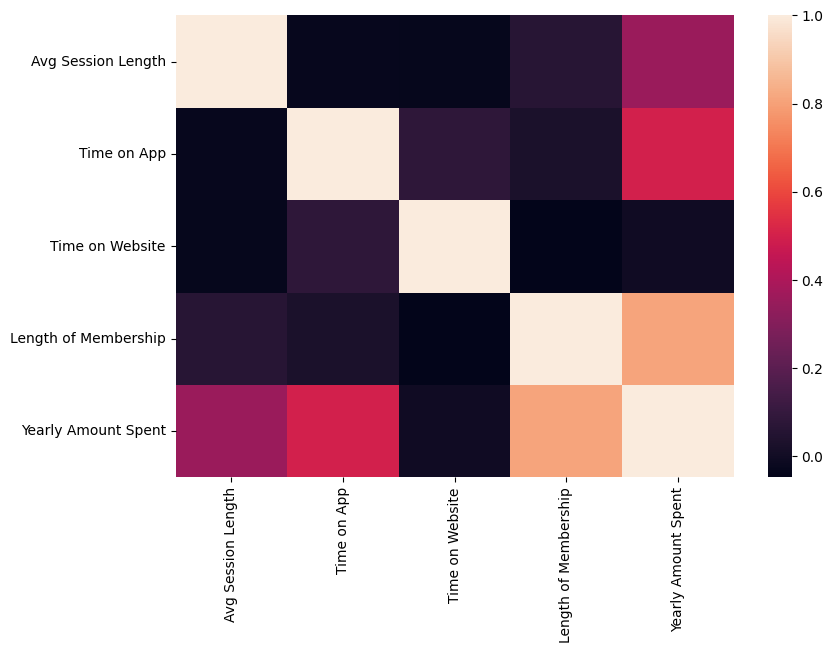

In [9]:
#getting all correlations between new features:
sns.heatmap(E_commerce.corr())

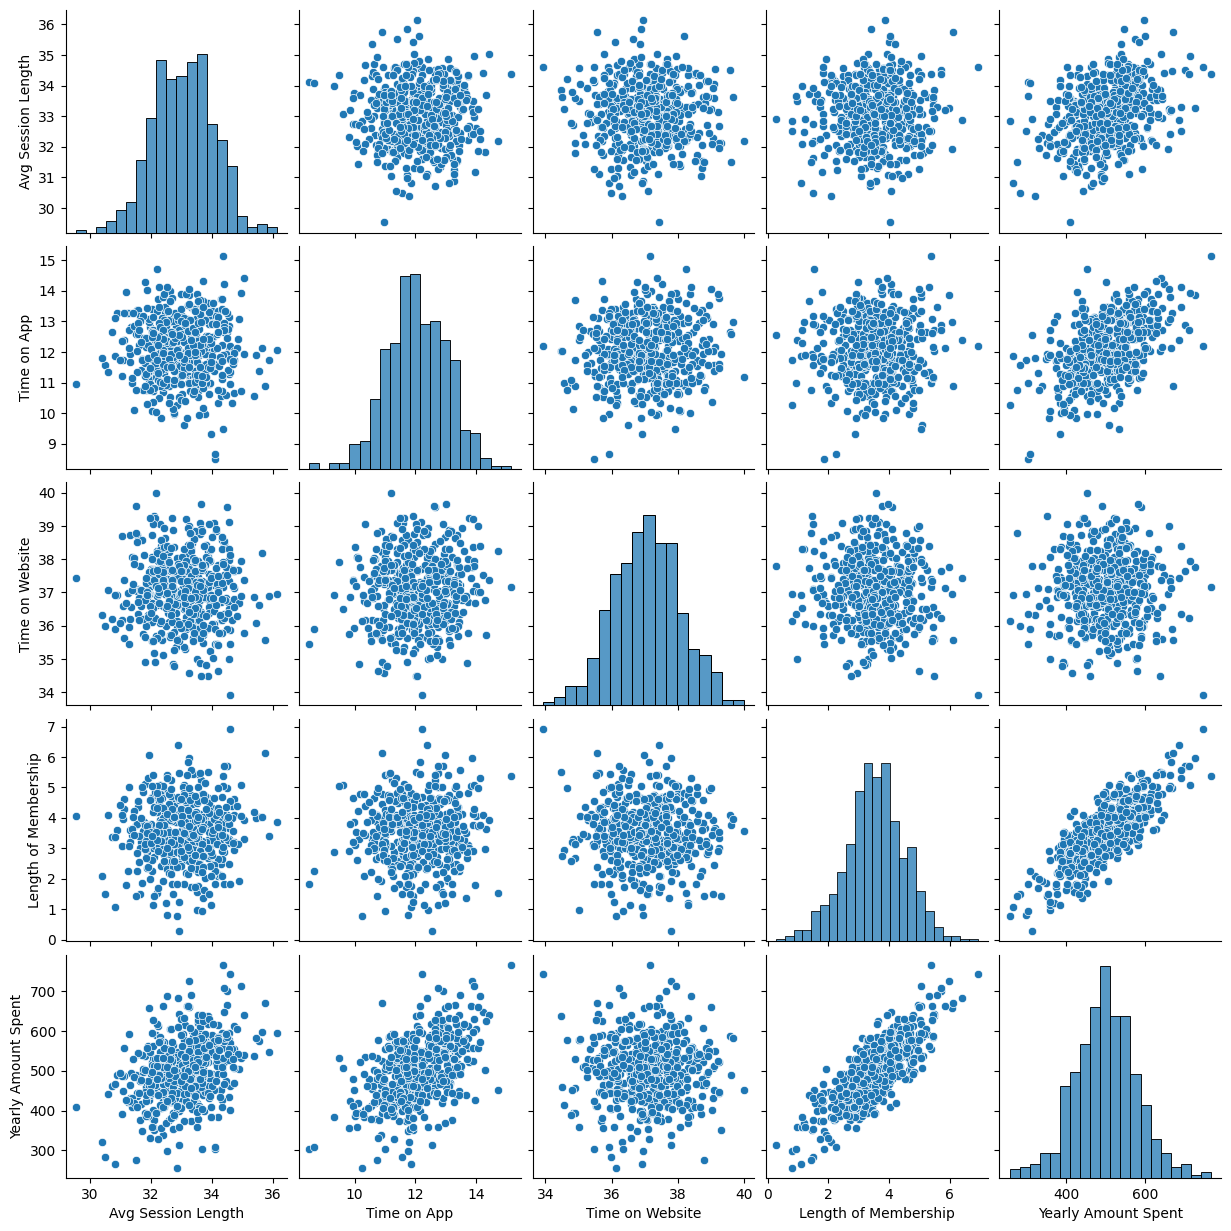

In [10]:
#getting all correlations between new features:
sns.pairplot(E_commerce)

Splitting the Data into feautures (X) and labels (Y):

In [12]:
features = E_commerce.drop(['Yearly Amount Spent'],axis=1)
labels = E_commerce['Yearly Amount Spent']

Splitting Training, Test, and Validation data

In [13]:
# remark: we fix random_state the end, to make sure we always get the same split
features_train, features_validation_test, labels_train, labels_validation_test = train_test_split(
    features, labels, test_size=0.4, random_state=100)

In [14]:
features_validation, features_test, labels_validation, labels_test = train_test_split(
    features_validation_test, labels_validation_test, test_size=0.5, random_state=100)

In [15]:
print(len(features_train))
print(len(features_validation))
print(len(features_test))
print(len(labels_train))
print(len(labels_validation))
print(len(labels_test))

300
100
100
300
100
100


In [29]:
from sklearn.metrics import mean_squared_error

def display_results(model):
    coefs = [model.intercept_]
    coefs += list(model.coef_)
    ytrain_predict = model.predict(features_train)
    ytest_predict = model.predict(features_test)
    yvalidation_predict=model.predict(features_validation)
    
    train_error = np.sqrt(mean_squared_error(labels_train, ytrain_predict))
    test_error = np.sqrt(mean_squared_error(labels_test, ytest_predict))
    validation_error = np.sqrt(mean_squared_error(labels_validation, yvalidation_predict))

    
    print("Training error (rmse):", train_error)
    print("Testing error (rmse):", test_error)
    print("Validation error (rmse):", validation_error)


    # Scatter plot for training and testing predictions
    plt.scatter(labels_train, ytrain_predict, marker='o', label='Train Predictions')
    plt.scatter(labels_test, ytest_predict, marker='^', label='Test Predictions')
    plt.scatter(labels_validation, yvalidation_predict, marker='x', label='Validation Predictions')

    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title('True vs Predicted Values')
    plt.legend()
    plt.show()

    print("Coefficients:")
    print(coefs)
    print('Yearly Amount Spent Predected=',coefs[0],'+',coefs[1],'*Avg Session Length','+',coefs[2],'*Time on App','+',coefs[3],'*Time on Website','+',coefs[4],'*Length of Membership')
    

Model Training

1. Linear Regression

In [30]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [31]:
lin_reg_model.fit(features_train,labels_train)

LinearRegression()

Model Evaluation (Visualize the actual prices and Predicted prices)

Training error (rmse): 9.972305649599212
Testing error (rmse): 9.375174935612831
Validation error (rmse): 10.403959288894558


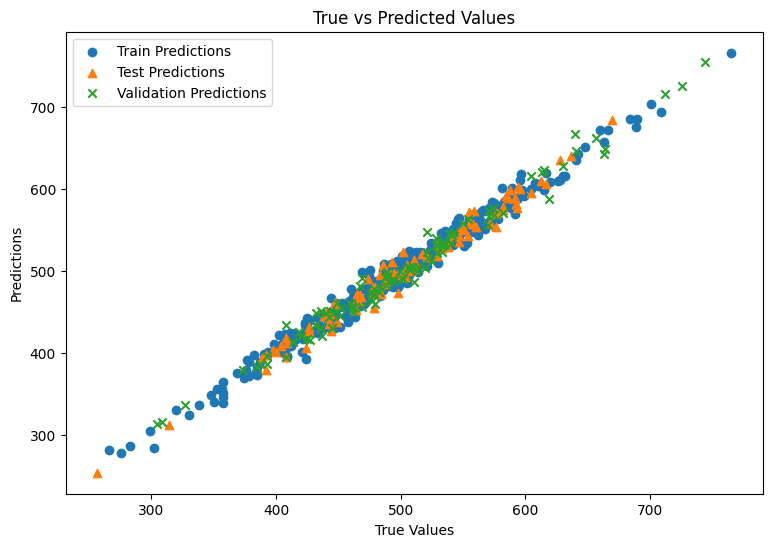

Coefficients:
[np.float64(-1052.7264594695523), np.float64(26.038222189950705), np.float64(38.53217342177375), np.float64(0.2215574171559498), np.float64(61.79333332094075)]
Yearly Amount Spent Predected= -1052.7264594695523 + 26.038222189950705 *Avg Session Length + 38.53217342177375 *Time on App + 0.2215574171559498 *Time on Website + 61.79333332094075 *Length of Membership


In [32]:
display_results(lin_reg_model)

2. Lasso Regression

In [33]:
# loading the linear regression model
lass_reg_model = Lasso()

In [34]:
lass_reg_model.fit(features_train,labels_train)

Lasso()

Training error (rmse): 10.112202512120142
Testing error (rmse): 9.434404811423722
Validation error (rmse): 10.443743878897944


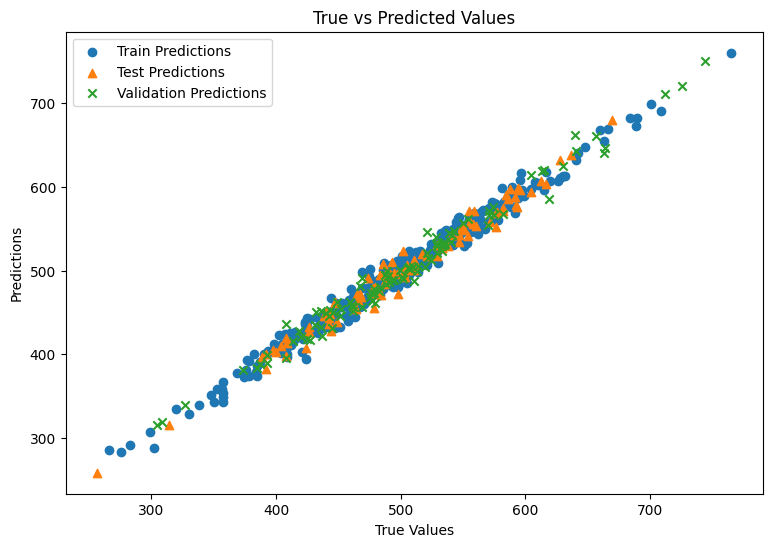

Coefficients:
[np.float64(-998.5065218822431), np.float64(25.06217031055714), np.float64(37.64847190911809), np.float64(0.0), np.float64(60.906485368560055)]
Yearly Amount Spent Predected= -998.5065218822431 + 25.06217031055714 *Avg Session Length + 37.64847190911809 *Time on App + 0.0 *Time on Website + 60.906485368560055 *Length of Membership


In [35]:
display_results(lass_reg_model)

**2. Ridge Regression**

In [36]:
# loading the linear regression model
rid_reg_model = Ridge()

In [37]:
rid_reg_model.fit(features_train,labels_train)

Ridge()

Training error (rmse): 9.975373656135845
Testing error (rmse): 9.363122889976077
Validation error (rmse): 10.395764279478538


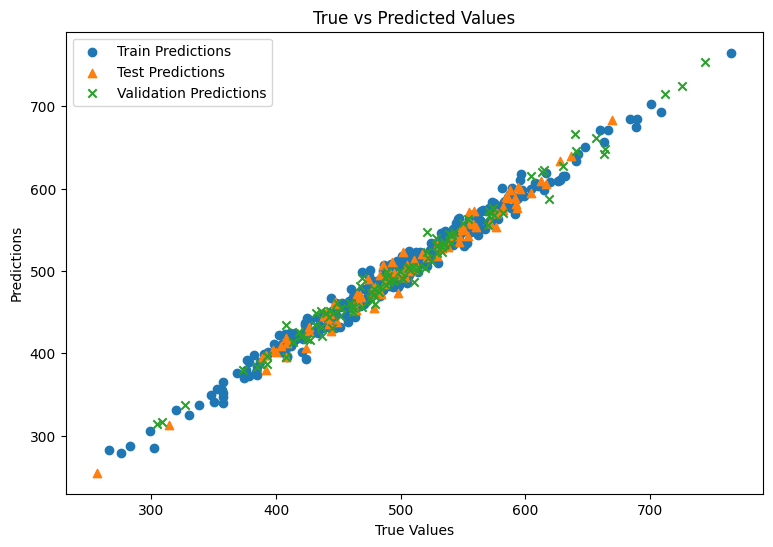

Coefficients:
[np.float64(-1048.5511592407147), np.float64(25.962102500209884), np.float64(38.42501153392017), np.float64(0.23045618991903213), np.float64(61.594158427141046)]
Yearly Amount Spent Predected= -1048.5511592407147 + 25.962102500209884 *Avg Session Length + 38.42501153392017 *Time on App + 0.23045618991903213 *Time on Website + 61.594158427141046 *Length of Membership


In [38]:
display_results(rid_reg_model)

Building a Predictive System

In [39]:
input_data = (35,11,41,3)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = lin_reg_model.predict(input_data_reshaped)
print(prediction)

print('The yearly amount spent is predicted to be ', prediction[0])

[476.92907888]
The yearly amount spent is predicted to be  476.9290788844496


C:\Users\moham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
